# 신용카드 사용자 연체 예측 AI 경진대회

DACON
- 대회기간 2021.04.05 ~ 2021.05.24 17:59

## EDA

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('./data/train.csv', index_col='index')
train_y = train['credit'].astype(int)
train

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
index,,,,,,,,,,,,,,,,,,,
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0



- 범주형
    - 명목형
        - 이진형
            - gender
            - car
            - reality
            - FLAG_MOBIL
            - work_phone
            - phone
            - email
        - 다중형
            - income_type
            - edu_type
            - family_type
            - house_type
            - occyp_type
            - credit
- 수치형
    - child_num
    - family_size
    - income_total

    - DAYS_BIRTH
    - DAYS_EMPLOYED
    - begin_month
            

#### * gender: 성별

#### * car: 차량 소유 여부

#### * reality: 부동산 소유 여부

#### * child_num: 자녀 수

#### * income_total: 연간 소득

#### * income_type: 소득 분류
    - 'Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student'

#### * edu_type: 교육 수준
    - 'Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree'

#### * family_type: 결혼 여부
    - 'Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow'

#### * house_type: 생활 방식
    - 'Municipal apartment', 'House / apartment', 'With parents','Co-op apartment', 'Rented apartment', 'Office apartment'

#### * DAYS_BIRTH: 출생일
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미

#### * DAYS_EMPLOYED: 업무 시작일
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미					
    - 양수 값은 고용되지 않은 상태를 의미함

#### * FLAG_MOBIL: 핸드폰 소유 여부

#### * work_phone: 업무용 전화 소유 여부

#### * phone: 자택 전화 소유 여부

#### * email: 이메일 소유 여부


#### * occyp_type: 직업 유형													

#### * family_size: 가족 규모

#### * begin_month: 신용카드 발급 월
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미

#### * credit: 사용자의 신용카드 대금 연체를 기준의 신용도
    - 낮을 수록 높은 신용의 신용카드 사용자를 의미함`

### 이진형

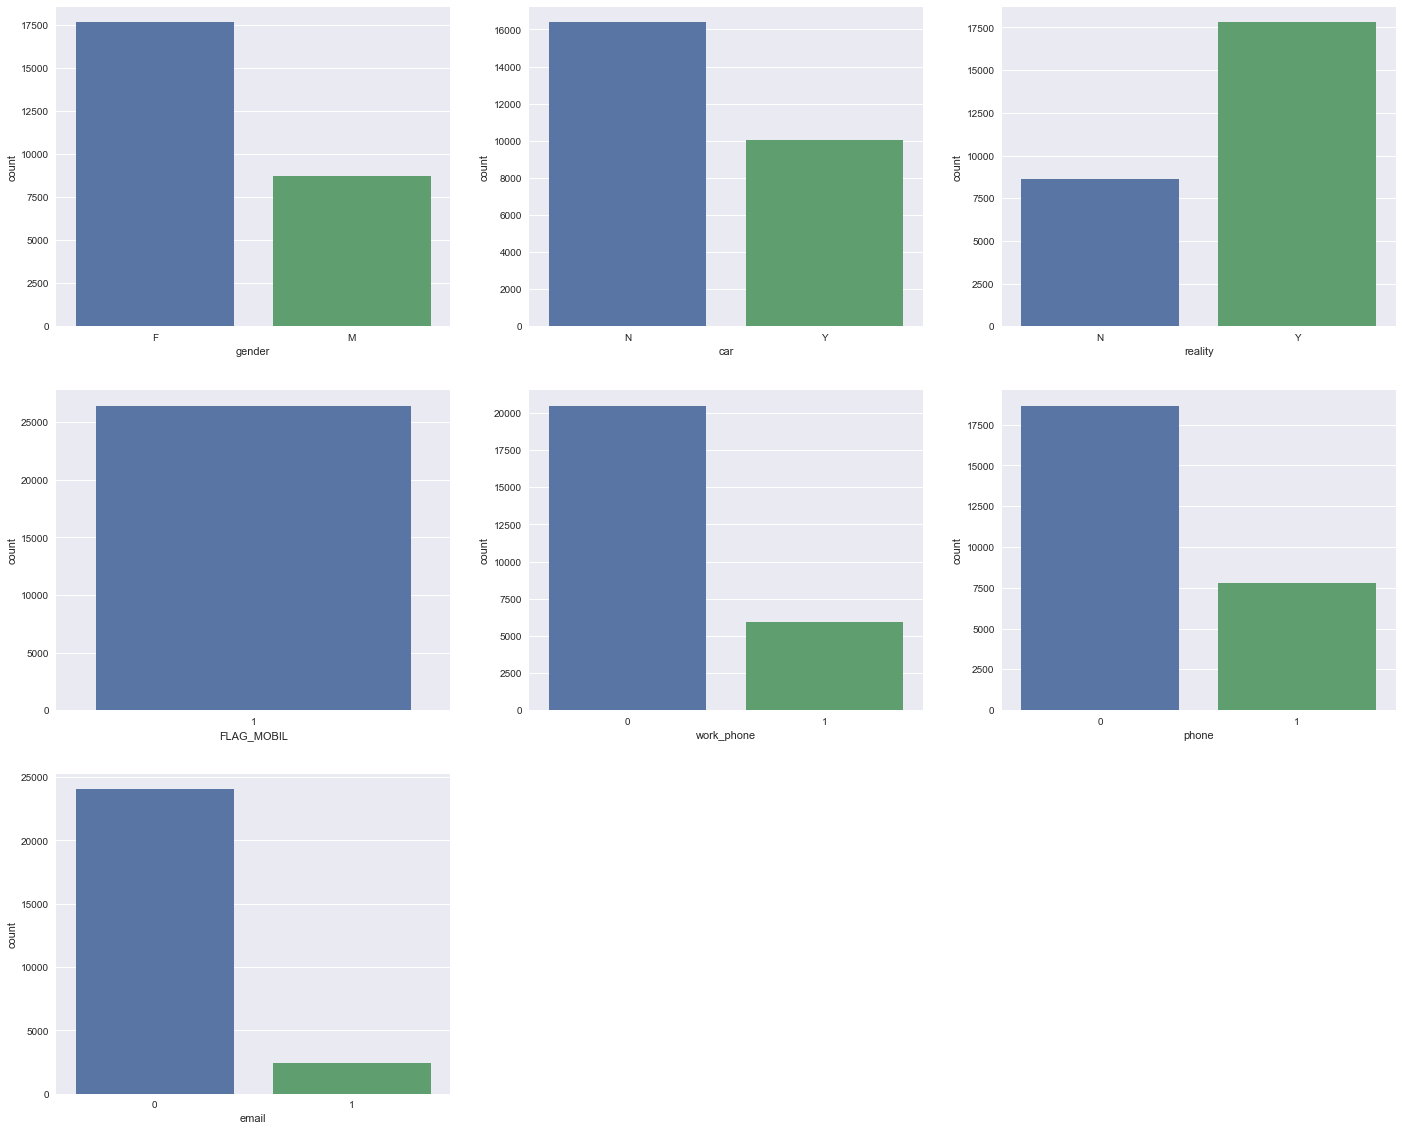

In [3]:
#gender와 credit
fig = plt.figure(figsize=[24,20])
ax1 = fig.add_subplot(3,3,1)
ax1 = sns.countplot(x='gender', data=train)

#car와 credit
ax2 = fig.add_subplot(3,3,2)
ax2 = sns.countplot(x='car', data=train)

#reality와 credit
ax3 = fig.add_subplot(3,3,3)
ax3 = sns.countplot(x='reality', data=train)

#FLAG_MOBIL와 credit
ax4 = fig.add_subplot(3,3,4)
ax4 = sns.countplot(x='FLAG_MOBIL', data=train)

#work_phone와 credit
ax5 = fig.add_subplot(3,3,5)
ax5 = sns.countplot(x='work_phone', data=train)

#phone credit
ax6 = fig.add_subplot(3,3,6)
ax6 = sns.countplot(x='phone', data=train,)

#email credit
ax7 = fig.add_subplot(3,3,7)
ax7 = sns.countplot(x='email', data=train)

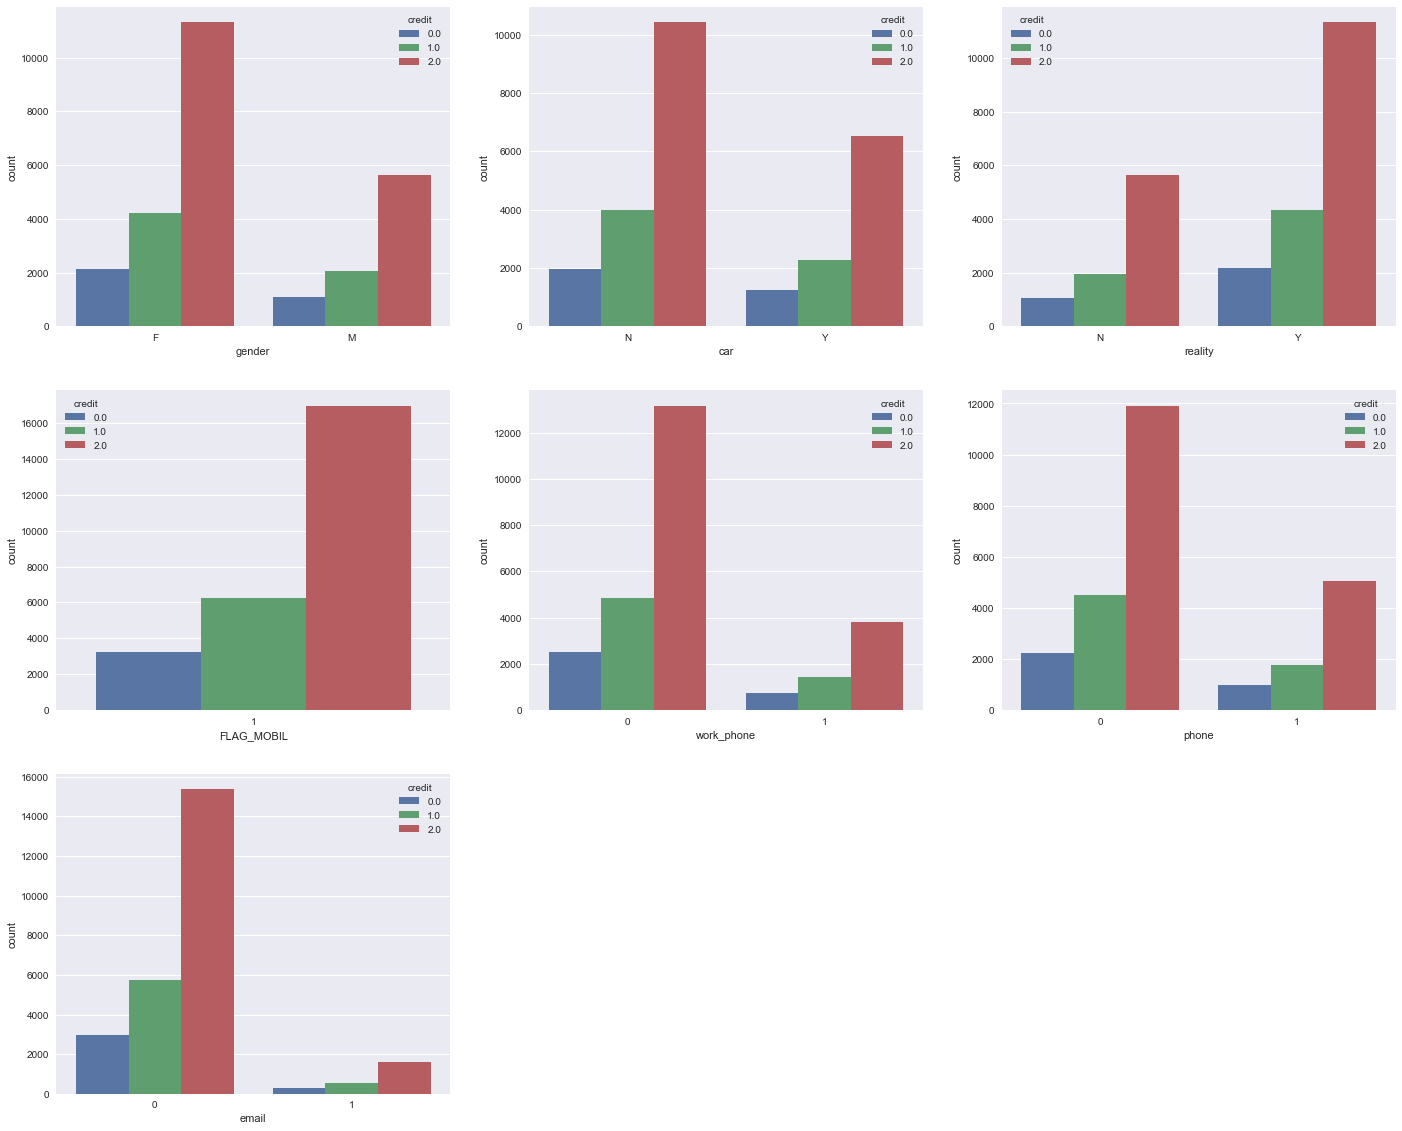

In [4]:
#gender와 credit
fig = plt.figure(figsize=[24,20])
ax1 = fig.add_subplot(3,3,1)
ax1 = sns.countplot(x='gender', data=train, hue='credit')

#car와 credit
ax2 = fig.add_subplot(3,3,2)
ax2 = sns.countplot(x='car', data=train, hue='credit')

#reality와 credit
ax3 = fig.add_subplot(3,3,3)
ax3 = sns.countplot(x='reality', data=train, hue='credit')

#FLAG_MOBIL와 credit
ax4 = fig.add_subplot(3,3,4)
ax4 = sns.countplot(x='FLAG_MOBIL', data=train, hue='credit')

#work_phone와 credit
ax5 = fig.add_subplot(3,3,5)
ax5 = sns.countplot(x='work_phone', data=train, hue='credit')

#phone credit
ax6 = fig.add_subplot(3,3,6)
ax6 = sns.countplot(x='phone', data=train, hue='credit')

#email credit
ax7 = fig.add_subplot(3,3,7)
ax7 = sns.countplot(x='email', data=train, hue='credit')


- 대체로 credit = 2 인 경우가 많고 특정 변수와 credit과의 관계가 뚜렷하게 보이지는 않음


- 각 변수의 개수 특징
    - 여성이 남성보다 많다
    - 차가 없는 사람이 더 많다
    - 부동산이 있는사람이 더 많다
    - FLAG_MOBIL은 데이터 전체가 1로 통일되어 있다
    - 직장 전화가 없는 사람이 더 많다
    - 자택 전화가 없는 사람이 더 많다
    - e-mail이 없는 사람이 더 많다


        - 다중형
            - income_type
            - edu_type
            - family_type
            - house_type
            - occyp_type
            - credit

### 다중형

In [5]:
def categorical_show(df, col, y_cols='credit'):
    from collections import Counter
    print('unique items:', df[col].unique())
    print()
    counter = Counter(df[col])
    print(counter)
    plt.bar(counter.keys(), counter.values())
    plt.xticks(rotation=30)
    plt.title('people in classes')
    plt.show()
    
    fig, axes = plt.subplots(1, len(df[col].unique()), figsize=(16, 4))

    for i, w in enumerate(df[col].unique()):
        axes[i].hist(df[y_cols][df[col]==w], bins=3, color='dimgray',  rwidth=0.8)
        axes[i].set_title(w)
    plt.show()

unique items: ['Commercial associate' 'Working' 'State servant' 'Pensioner' 'Student']

Counter({'Working': 13645, 'Commercial associate': 6202, 'Pensioner': 4449, 'State servant': 2154, 'Student': 7})


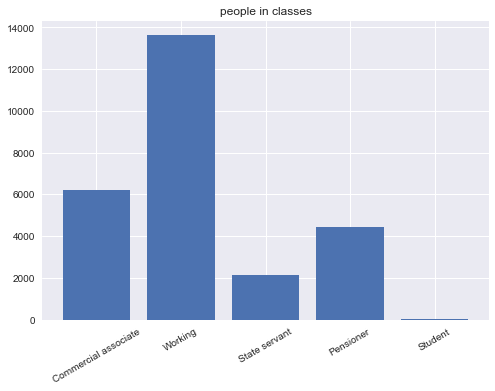

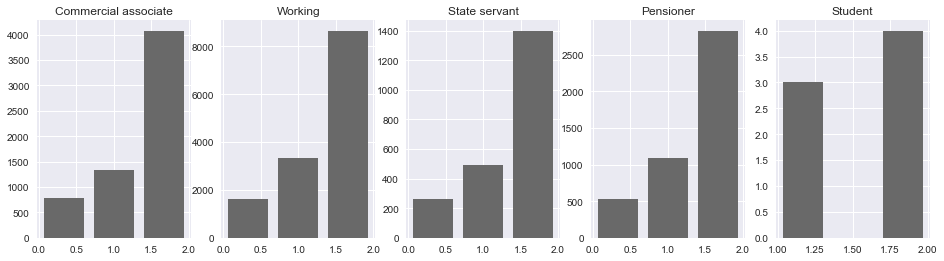

In [6]:
categorical_show(train, 'income_type')

unique items: ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

Counter({'Secondary / secondary special': 17995, 'Higher education': 7162, 'Incomplete higher': 1020, 'Lower secondary': 257, 'Academic degree': 23})


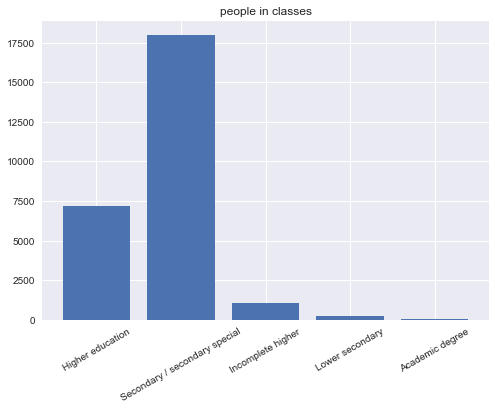

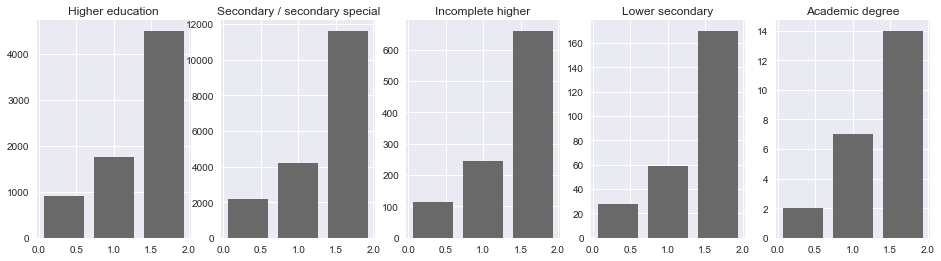

In [7]:
categorical_show(train, 'edu_type')

unique items: ['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']

Counter({'Married': 18196, 'Single / not married': 3496, 'Civil marriage': 2123, 'Separated': 1539, 'Widow': 1103})


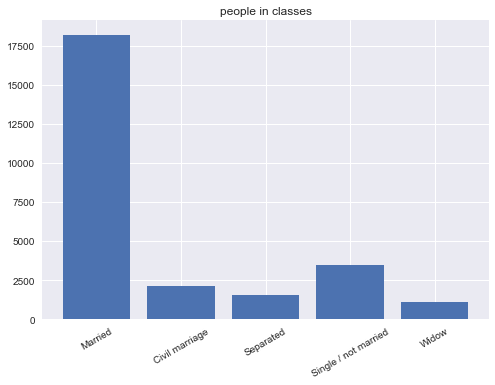

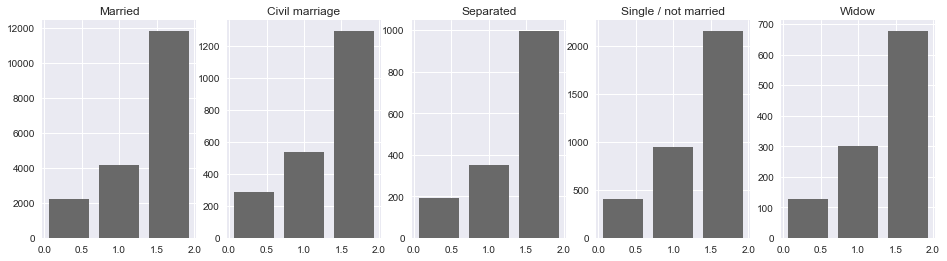

In [8]:
categorical_show(train, 'family_type')

unique items: ['Municipal apartment' 'House / apartment' 'With parents'
 'Co-op apartment' 'Rented apartment' 'Office apartment']

Counter({'House / apartment': 23653, 'With parents': 1257, 'Municipal apartment': 818, 'Rented apartment': 429, 'Office apartment': 190, 'Co-op apartment': 110})


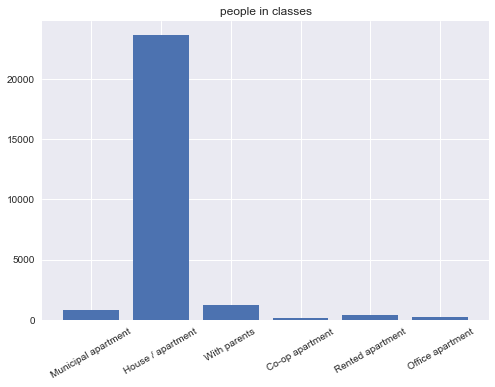

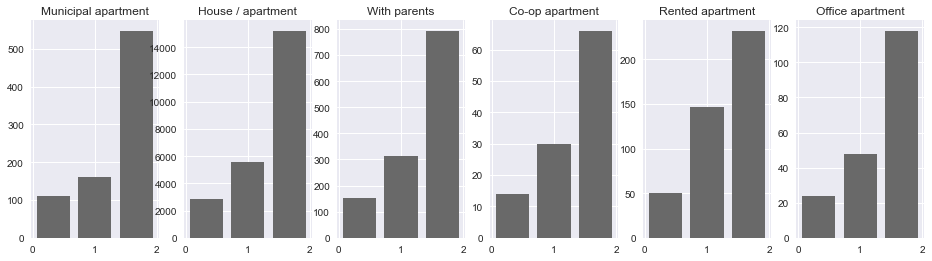

In [9]:
categorical_show(train, 'house_type')

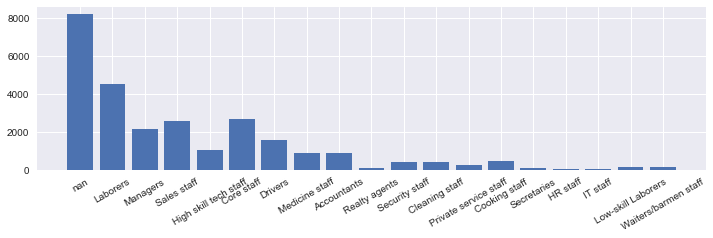

In [10]:
plt.figure(figsize=(12, 3))
counter = Counter(train.replace(np.nan, 'nan')['occyp_type'])
plt.bar(counter.keys(), counter.values())
plt.xticks(rotation=30)
plt.show()

occyp_type에는 결측값이 있고, 이것을 하나의 카테고리로 변환해서 사용할것

In [11]:
train= train.fillna('unmeasurable')
train.head(3)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
index,,,,,,,,,,,,,,,,,,,
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,unmeasurable,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0


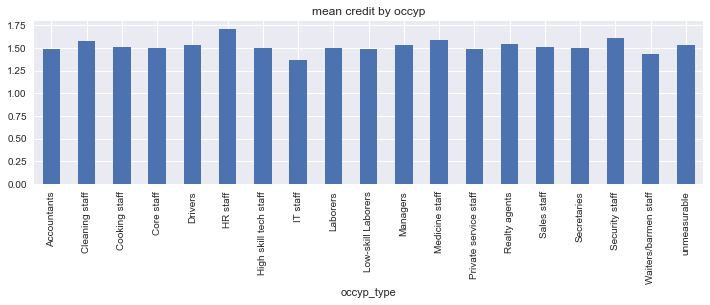

In [12]:
plt.figure(figsize=(12, 3))
train.groupby('occyp_type').credit.mean().plot.bar()
plt.title('mean credit by occyp')
plt.show()

unique items: [1. 2. 0.]

Counter({2.0: 16968, 1.0: 6267, 0.0: 3222})


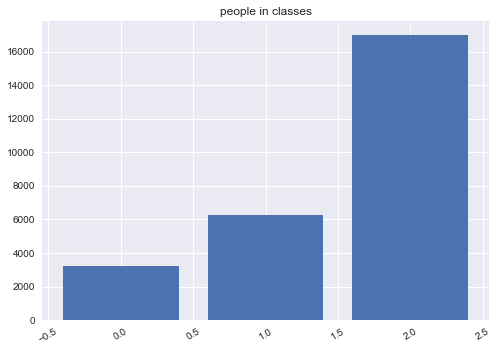

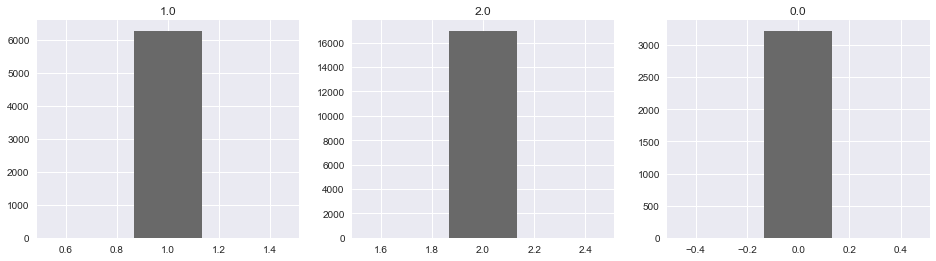

In [13]:
categorical_show(train, 'credit')

### 수치형

In [14]:
# child_num

# family_size

# income_total

# DAYS_BIRTH

# DAYS_EMPLOYED

# begin_month



#### child_num과 family_size간의 관계

In [15]:
train[['child_num','family_size']]

,child_num,family_size
index,,
0,0,2.0
1,1,3.0
2,0,2.0
3,0,2.0
4,0,2.0
...,...,...
26452,2,4.0
26453,1,2.0
26454,0,2.0


In [16]:
train[train['family_size']-train['child_num'] > 0]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
index,,,,,,,,,,,,,,,,,,,
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,unmeasurable,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,unmeasurable,2.0,-47.0,2.0
26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0


In [17]:
train[train['family_size']-train['child_num'] < 0]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
index,,,,,,,,,,,,,,,,,,,
14900,M,Y,N,2,225000.0,Working,Secondary / secondary special,Married,House / apartment,-14776,-2212,1,0,0,0,Drivers,1.0,-30.0,2.0


- child_num이 2인데 family_size가 1인 특이한 경우를 발견
    - 자녀와 부인이 사망했을 경우를 생각했지만 family_type이 widow가 아닌 married임이 이상하다.

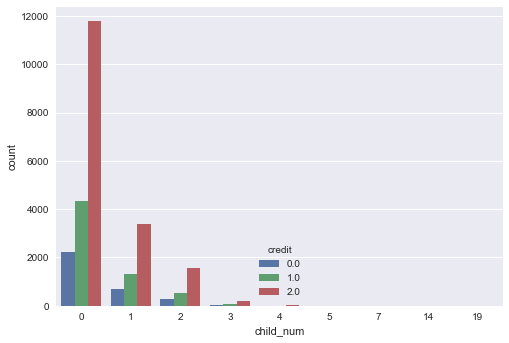

In [18]:
sns.countplot(x='child_num', data=train, hue='credit')

In [19]:
train[train['child_num']==7]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
index,,,,,,,,,,,,,,,,,,,
25313,F,N,N,7,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13827,-1649,1,1,1,0,Cleaning staff,9.0,-26.0,2.0
25638,F,N,N,7,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13827,-1649,1,1,1,0,Cleaning staff,9.0,-31.0,2.0


In [20]:
train[train['child_num']==14]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
index,,,,,,,,,,,,,,,,,,,
8462,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15.0,-7.0,2.0
9021,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15.0,-58.0,2.0
25390,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15.0,-43.0,2.0


In [21]:
train[train['child_num']==19]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
index,,,,,,,,,,,,,,,,,,,
10731,F,N,Y,19,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-11057,-1853,1,1,1,0,Waiters/barmen staff,20.0,-5.0,2.0


- child_num의 수가 7명부터 19명까지의 데이터가 존재한다.
    - child_num이 7과 14 인경우에 알게된점
        - 나이를 비롯한 모든 변수들이 동일하다.
        - begin_month의 수치가 다른것을 보아 같은사람이 카드발급을 여러번 한 것으로 추정됨
        - 자녀의 수가 14인 경우에는 Separated인 family_type을 가지고있다.
    - child_num이 19인경우에 알게된점
        - 싱글인데 자녀의 수가 19명이다. (family_size : 20)
        - Single / not married(결혼하지않음)인데 자녀가 있다.
        
특이한 데이터가 있어서 당황스럽긴 하지만, 공통적으로 credit은 2이므로 낮은 신용을 가진다.

In [22]:
train[['family_size','child_num']].corr()

,family_size,child_num
family_size,1.00000,0.89053
child_num,0.89053,1.00000


#### income_total 과 credit의 관계

Text(0.5, 1.0, 'credit = 2')

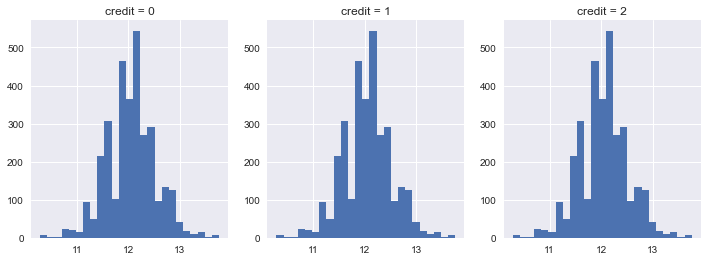

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
train['income_total'].apply(np.log)[train['credit']==0].hist(bins=25, ax=axes[0])
train['income_total'].apply(np.log)[train['credit']==0].hist(bins=25, ax=axes[1])
train['income_total'].apply(np.log)[train['credit']==0].hist(bins=25, ax=axes[2])

axes[0].set_title('credit = 0')
axes[1].set_title('credit = 1')
axes[2].set_title('credit = 2')

credit에 등급에 따른 income_total의 차이를 느끼기 힘듬

income_total과 occyp_type을 이용한, 직업별 수익 확인

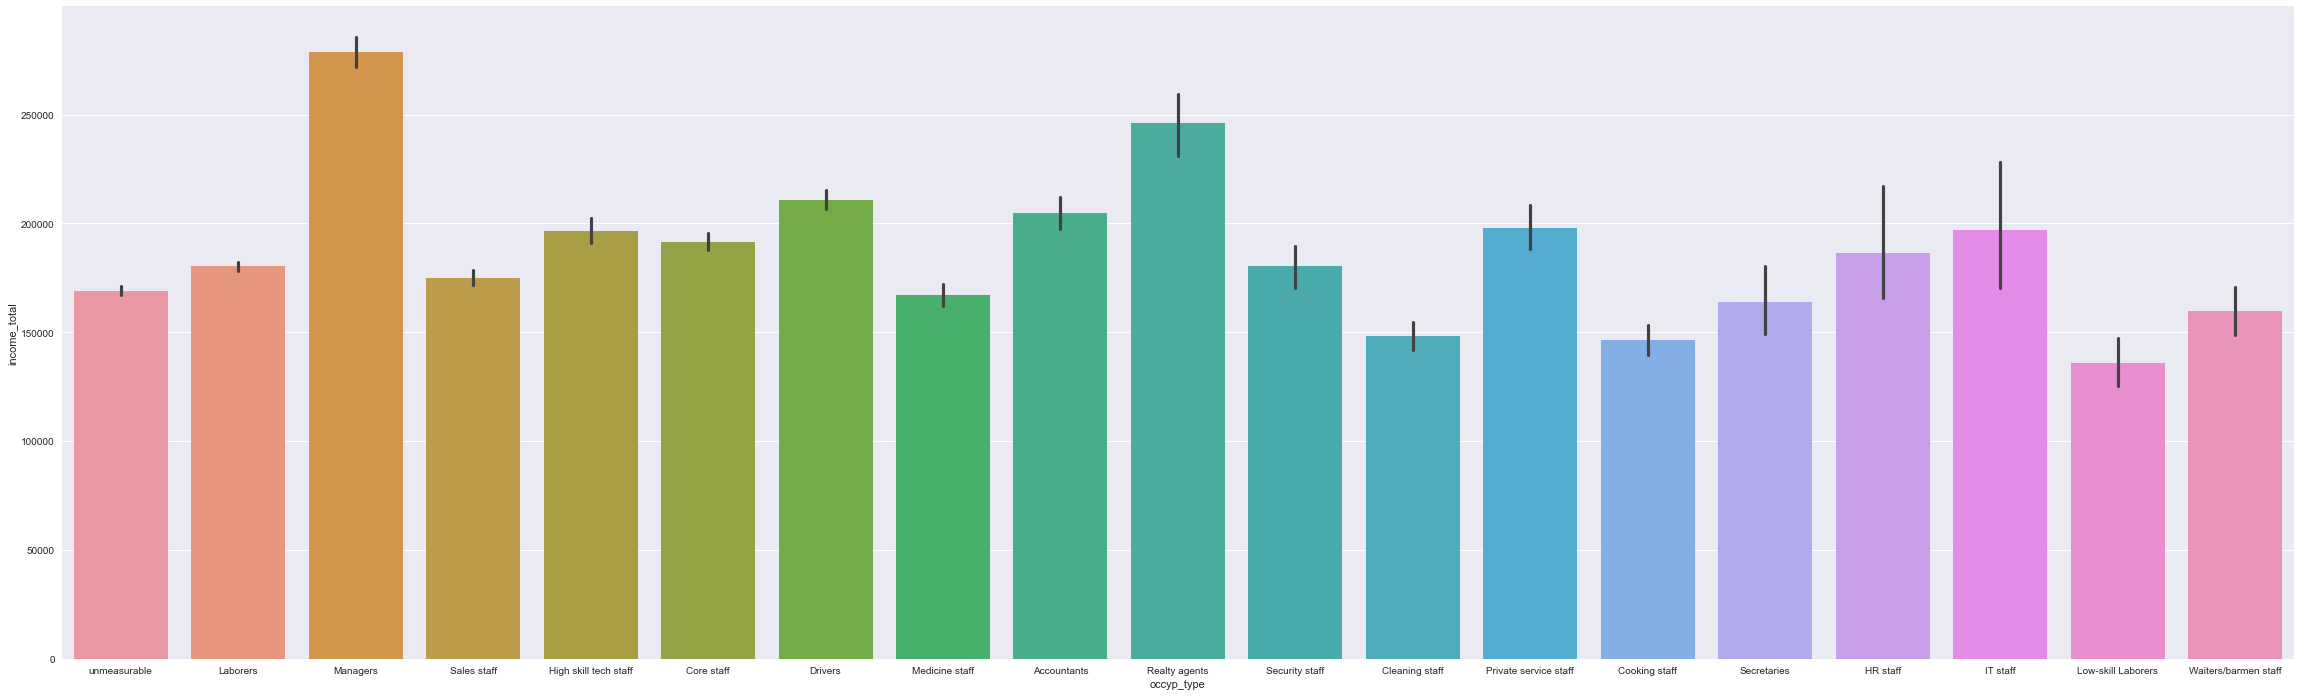

In [24]:
plt.figure(figsize = [40, 12])

fig.add_subplot(4,1,3)
sns.barplot(data=train, x='occyp_type',y='income_total')



Managers, Realty agents, Drivers, Accountants 순서로 높은 수익을 얻는다
    - 수치로 확인해보자

In [25]:
train.groupby('occyp_type')['income_total'].agg([max, min]).T

occyp_type,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,unmeasurable
max,661500.0,450000.0,495000.0,990000.0,900000.0,675000.0,900000.0,540000.0,900000.0,337500.0,1575000.0,450000.0,423000.0,328500.0,697500.0,382500.0,810000.0,360000.0,900000.0
min,45000.0,31500.0,40500.0,36000.0,58500.0,112500.0,63000.0,103500.0,36000.0,45000.0,27000.0,45000.0,81000.0,90000.0,45000.0,67500.0,27000.0,67500.0,29250.0


In [26]:
train[['income_total']].groupby(train.occyp_type).mean()

,income_total
occyp_type,
Accountants,204651.942905
Cleaning staff,148209.677419
Cooking staff,146275.601751
Core staff,191473.629252
Drivers,210853.714286
HR staff,186387.096774
High skill tech staff,196602.403846
IT staff,196770.731707
Laborers,180307.189827


DAYS_BIRTH : 만 나이로 환산해서 확인

In [27]:
def agemaker(x):
    return round(abs(x)/365)

In [28]:
train_age=train.copy()
train_age['AGE']=train_age[['DAYS_BIRTH']].apply(agemaker)
train_age.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,AGE
index,,,,,,,,,,,,,,,,,,,,
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,unmeasurable,2.0,-6.0,1.0,38.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0,31.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0,52.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0,41.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0,41.0


1. age의 분포
2. gender에 따른 age분포 
3. age에 대한 income_total 분포
4. gender와 age에 대한 income_total 분포

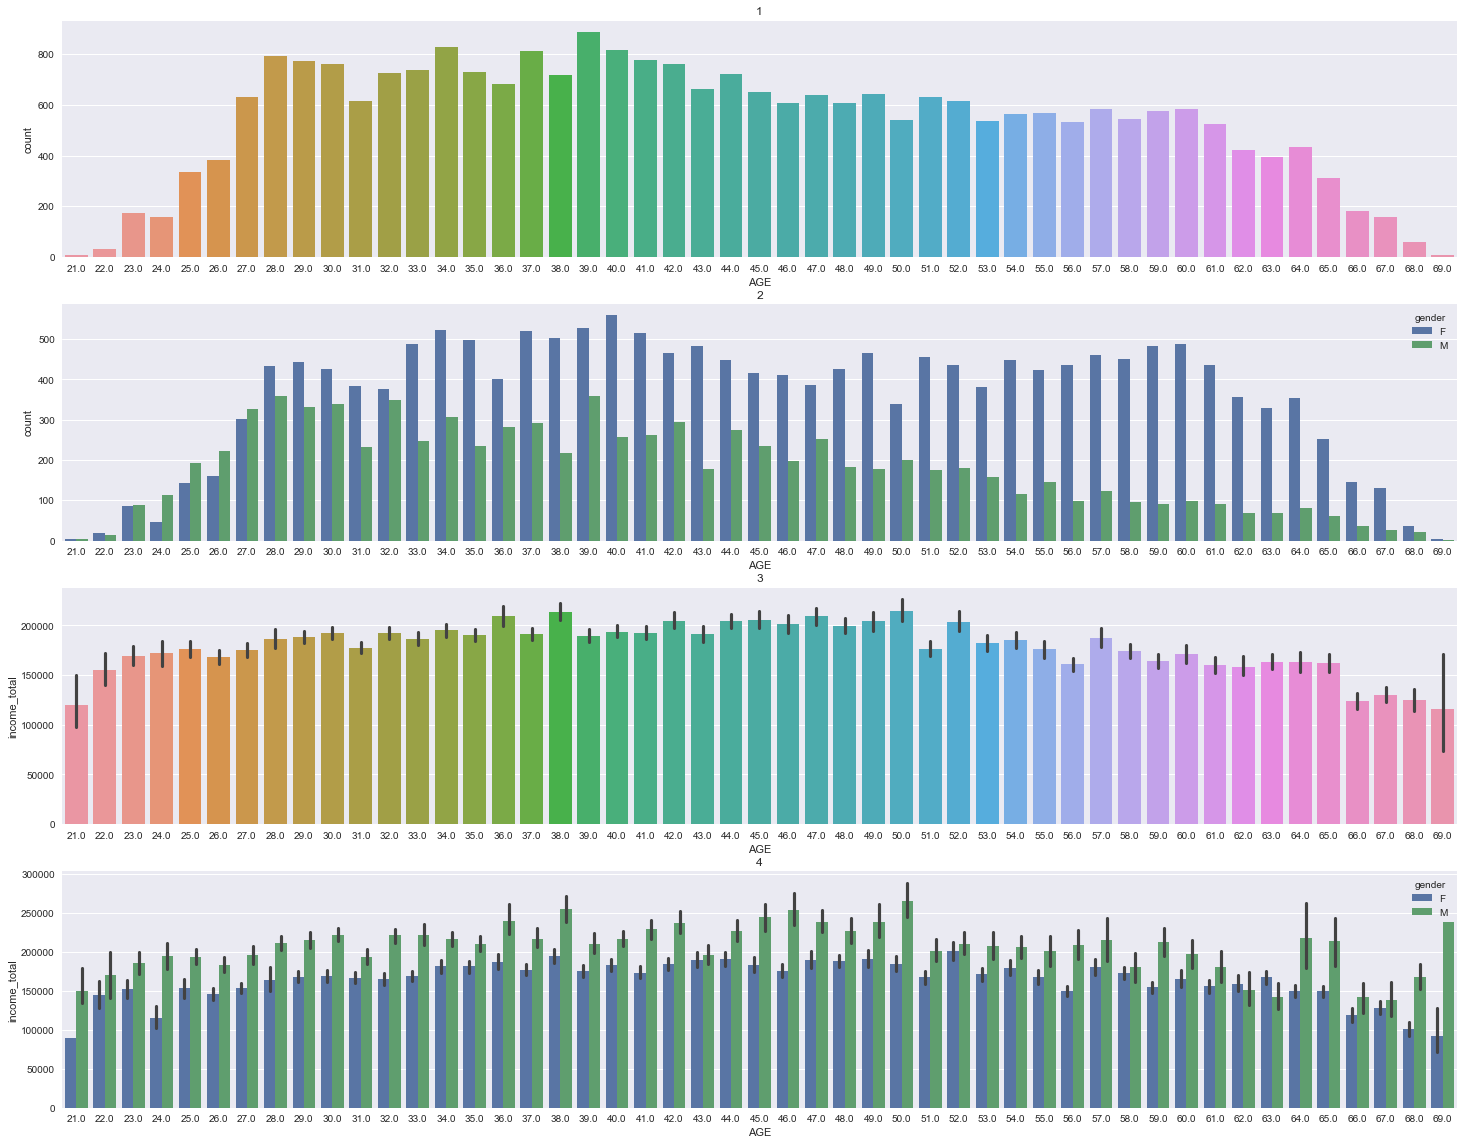

In [29]:
fig = plt.figure(figsize = [25, 20])
ax1 = fig.add_subplot(4,1,1)
ax1 = sns.countplot(data=train_age, x='AGE')
ax1=  plt.title("1")

ax2 = fig.add_subplot(4,1,2)
ax2 = sns.countplot(data=train_age, x='AGE',hue='gender')
ax2=  plt.title("2")

ax3 = fig.add_subplot(4,1,3)
ax3 = sns.barplot(data=train_age, x='AGE',y='income_total')
ax3=  plt.title("3")

ax4 = fig.add_subplot(4,1,4)
ax4 = sns.barplot(data=train_age, x='AGE',y='income_total',hue='gender')
ax4=  plt.title("4")

- 20대에서 40대까지의 고객이 가장많이 분포해있고, 30대 이후부터는 F성별이 M성별보다 눈에 띄게 차이가 난다.
- income_total은 30대 부터 50대 초반까지 높은 수치를 보이고, M성별이 F성별보다 수익을 얻는다.